In [1]:
import cmath
import numpy as np
import svgpathtools
import pandas as pd

In [2]:
%matplotlib notebook


In [3]:
def run_function(f):
    ft = []

    for t in range(0, 501):
        res = f(t*0.002)
        ft.append(res)
    return np.asarray(ft)


def generate_complex_circle(n):
    return lambda t: cmath.exp( (n*(-2)*cmath.pi*t*complex(0, 1)) )

def square(t):
    if t >= 0 and t < 0.25:
        return complex(-1, -1 + (t*8))
    elif t >= 0.25 and t < 0.5:
        return complex(-1 + (t-0.25)*8, 1)
    elif t >= 0.5 and t < 0.75:
        return complex(1, 1 - (t-0.5)*8)
    else:
        return complex(1  - (t-0.75)*8, -1)

def step(t):
    if t <= 0.5:
        return complex(0, 0)
    return complex(1, 0)


def complex2vector(vec):
    def conv(cmp):
        return np.asarray([
            cmp.real,
            cmp.imag
        ])
    return np.asarray([conv(i) for i in vec])

# this does a numerical integration by taking the mean
def get_cooeficient(f, n):
    ft = run_function(generate_complex_circle(-n))
    return  (ft * f)[:-1].mean(0)

def run_function_with_cooeficient(n, f):
    return get_cooeficient(f, n) * run_function(generate_complex_circle(n))

def generate_function_from_svg(path):
    paths, _ = svgpathtools.svg2paths(path)
    triangle = paths[0]
    def fn(t):
        return paths[0].point(t)
    return fn

In [4]:
import random
fs = run_function(square)
#f1 = run_function(generate_complex_circle(1))
#for i in range(1, 100):
#     f1 += ((random.random()*(100/i)*0.1)*run_function(generate_complex_circle(i)))  
#f1 = run_function(generate_function_from_svg('triangle.svg'))
f1 = fs

<IPython.core.display.Javascript object>


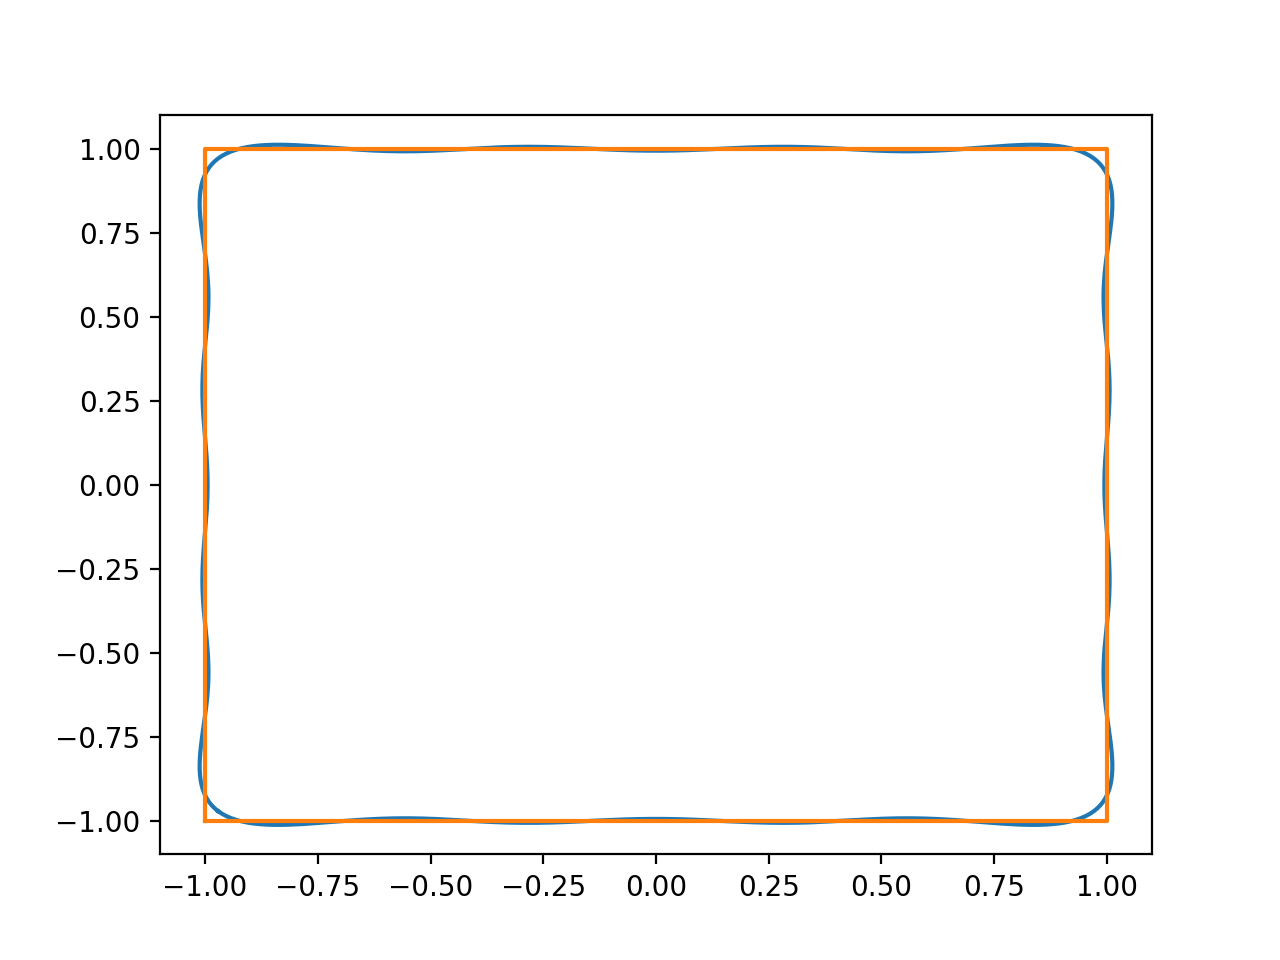

In [11]:

import matplotlib.pyplot as plt
import matplotlib.animation
from copy import deepcopy


fig, ax = plt.subplots()
plottable = complex2vector(f1)
l, = ax.plot(plottable[:, 0], plottable[:, 1])


ax.plot(plottable[:, 0], plottable[:, 1])
func = None
k = list(range(-200, 201))
k = sorted(k, key=lambda x: abs(x))
c = []
funcs = []
for i in k:
    c.append(get_cooeficient(f1, i))
    if func is None:
        func = run_function_with_cooeficient(i, f1)
    else:
        func += run_function_with_cooeficient(i, f1)
    funcs.append(deepcopy(complex2vector(func)))
    #ax.plot(funcs[-1][:, 0], funcs[-1][:, 1])


animate = lambda i: l.set_data(funcs[i][:, 0], funcs[i][:, 1])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(funcs))

plt.show()



<IPython.core.display.Javascript object>


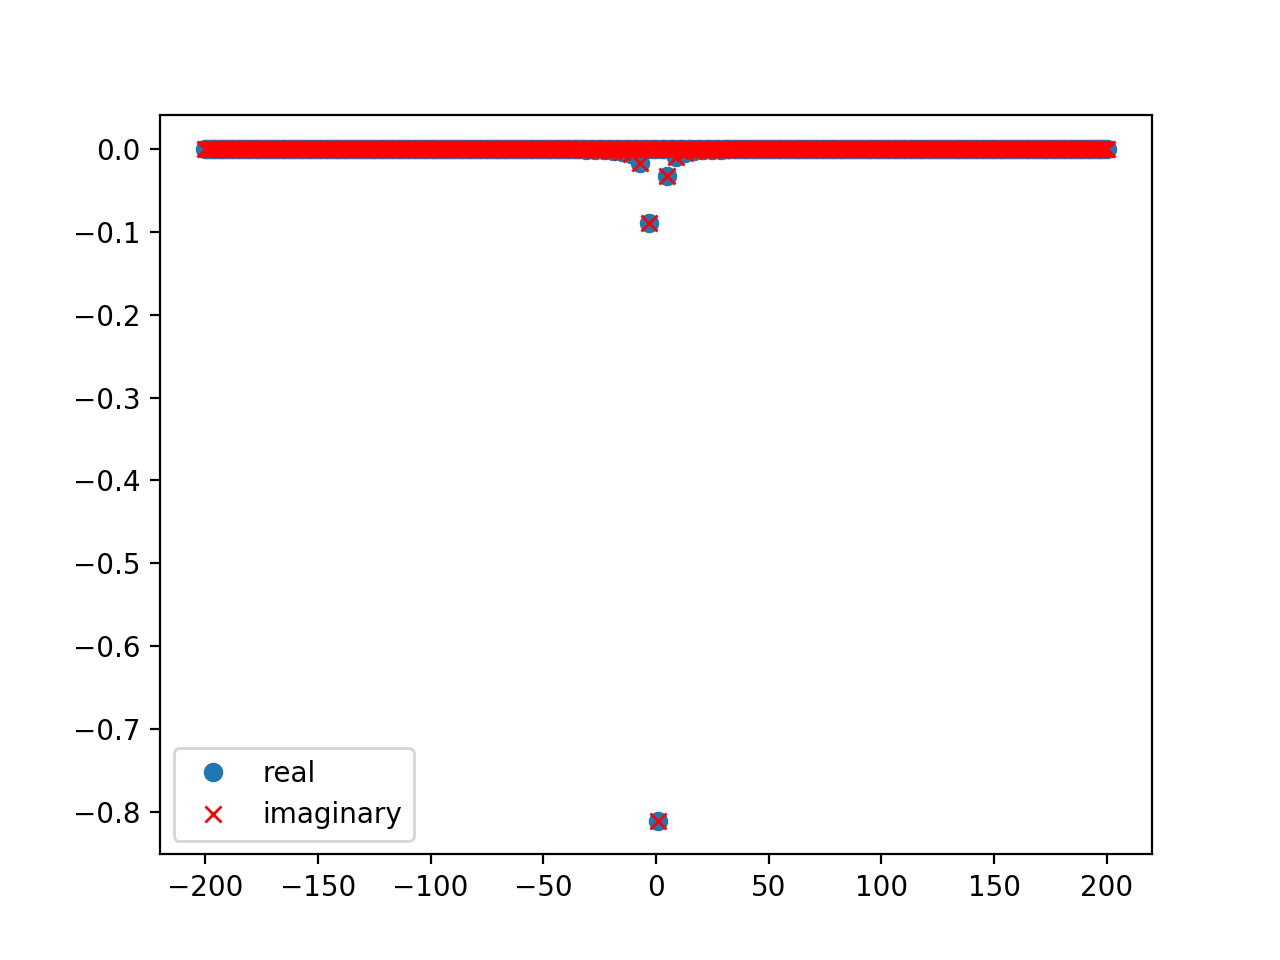

In [12]:
cs = pd.DataFrame(complex2vector(c), columns=['real', 'imaginary'])
cs.index = pd.Series(k)
cs.plot(style=['o','rx'])